In [29]:
import os
import re
import numpy as np
import pandas as pd
import unicodedata
import math
import copy
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X / 255

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

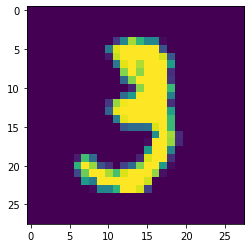

In [6]:
plt.imshow(X_train.iloc[10].values.reshape(28,28))

In [6]:
# X_train.iloc[10].values

In [7]:
# X_train = X_train/255.0
# X_train.iloc[10].values

<h1>SVM</h1>

In [7]:
C = [0.1, 1, 10]
kernal = ["linear", "poly", "rbf", "sigmoid"]
degree_for_poly = [3, 4]
gamma = ["scale", "auto"]
SVM_models = dict()
for k in kernal:
    for c in C:
        model_linear = SVC(kernel=k, C=c, max_iter=256)
        model_linear.fit(X_train, y_train)
        SVM_models[k+str(c)] = model_linear

In [49]:
# predict
SVM_predicts = dict()
for k in kernal:
    for c in C:
        SVM_predicts[k+str(c)] = SVM_models[k+str(c)].predict(X_test)

In [59]:
i = 0
for k in kernal:
    for c in C:
        # accuracy
        i += 1
        print(f"{i}) Model: SVM, Parameters: kernal: {k}, Reg parameter C: {str(c)}, accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=SVM_predicts[k+str(c)])}, Absolute Error: {metrics.mean_absolute_error(y_true=y_test, y_pred=SVM_predicts[k+str(c)])}, Mean Squared Error: {metrics.mean_squared_error(y_true=y_test, y_pred=SVM_predicts[k+str(c)])} \n")

        # cm
        # print(metrics.confusion_matrix(y_true=y_test, y_pred=SVM_predicts[k+str(c)]))
        

1) Model: SVM, Parameters: kernal: linear, Reg parameter C: 0.1, accuracy: 0.8246, Absolute Error: 0.5946, Mean Squared Error: 2.6294 

2) Model: SVM, Parameters: kernal: linear, Reg parameter C: 1, accuracy: 0.7485, Absolute Error: 0.8713, Mean Squared Error: 3.9459 

3) Model: SVM, Parameters: kernal: linear, Reg parameter C: 10, accuracy: 0.7481, Absolute Error: 0.8741, Mean Squared Error: 3.9597 

4) Model: SVM, Parameters: kernal: poly, Reg parameter C: 0.1, accuracy: 0.3469, Absolute Error: 3.036, Mean Squared Error: 17.6612 

5) Model: SVM, Parameters: kernal: poly, Reg parameter C: 1, accuracy: 0.8455, Absolute Error: 0.5299, Mean Squared Error: 2.2545 

6) Model: SVM, Parameters: kernal: poly, Reg parameter C: 10, accuracy: 0.975, Absolute Error: 0.0977, Mean Squared Error: 0.4857 

7) Model: SVM, Parameters: kernal: rbf, Reg parameter C: 0.1, accuracy: 0.8723, Absolute Error: 0.465, Mean Squared Error: 2.1346 

8) Model: SVM, Parameters: kernal: rbf, Reg parameter C: 1, accur

In [9]:
for k in kernal:
    for c in C:
        # accuracy
        print(f"Model: SVM, Parameters: kernal: {k}, Reg parameter C: {str(c)}, accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=SVM_predicts[k+str(c)])} \n")

        # cm
        print(metrics.confusion_matrix(y_true=y_test, y_pred=SVM_predicts[k+str(c)]))
        

Model: SVM, Parameters: kernal: linear, Reg parameter C: 0.1, accuracy: 0.8246 

[[ 956    0    4    1    1   13    2    1    1    1]
 [   0 1108    1    3    0    1    2    1   19    0]
 [  15   38  857   52    9    7   18    6   28    2]
 [   5    8   61  744    1  138    0   14   32    7]
 [   1    2    7    2  865    1    5    2    2   95]
 [  23   17   13   98   14  601   16    1  106    3]
 [   7    4    9    0    6   22  906    1    3    0]
 [   0    8   23    9    7    0    0  834    1  146]
 [  17   15   81  107   12   39   15    9  660   19]
 [   9    7    7   19  117    4    0  125    6  715]]
Model: SVM, Parameters: kernal: linear, Reg parameter C: 1, accuracy: 0.7485 

[[ 924    0   18    0    1   19    9    2    7    0]
 [   0 1058    0    4    0    1    2    0   69    1]
 [  24   90  775   51   14    8   20   14   35    1]
 [   9   29   73  616    2  216    1   17   30   17]
 [   3    3   14    2  811    3   10   14   10  112]
 [  26    5   15  121   10  607   20    2   

<h1>MLPClassifier AKA Neural Networks</h1>

In [33]:
hidden_layers = [10, 100]
activations = ["logistic", "tanh", "relu"]
optimizers = ["sgd", "adam"]
reg_parameters = [0.001, 0.1]
lr_parameters = [0.001, 0.01, 0.1]
NN_models = dict()
for h in hidden_layers:
    for a in activations:
        for o in optimizers:
            for reg in reg_parameters:
                for lr in lr_parameters:
                    model = MLPClassifier(random_state=1, hidden_layer_sizes=(h, ), activation=a, solver=o, alpha=reg, learning_rate_init=lr, max_iter=64)
                    model.fit(X_train, y_train)
                    NN_models[a+str(h)+o+str(reg)+str(lr)] = model 
                    print(a+str(h)+o+str(reg)+str(lr))

logistic10sgd0.0010.001
logistic10sgd0.0010.01
logistic10sgd0.0010.1
logistic10sgd0.10.001
logistic10sgd0.10.01
logistic10sgd0.10.1
logistic10adam0.0010.001
logistic10adam0.0010.01
logistic10adam0.0010.1
logistic10adam0.10.001
logistic10adam0.10.01
logistic10adam0.10.1
tanh10sgd0.0010.001
tanh10sgd0.0010.01
tanh10sgd0.0010.1
tanh10sgd0.10.001
tanh10sgd0.10.01
tanh10sgd0.10.1
tanh10adam0.0010.001
tanh10adam0.0010.01
tanh10adam0.0010.1
tanh10adam0.10.001
tanh10adam0.10.01
tanh10adam0.10.1
relu10sgd0.0010.001
relu10sgd0.0010.01
relu10sgd0.0010.1
relu10sgd0.10.001
relu10sgd0.10.01
relu10sgd0.10.1
relu10adam0.0010.001
relu10adam0.0010.01
relu10adam0.0010.1
relu10adam0.10.001
relu10adam0.10.01
relu10adam0.10.1
logistic100sgd0.0010.001
logistic100sgd0.0010.01
logistic100sgd0.0010.1
logistic100sgd0.10.001
logistic100sgd0.10.01
logistic100sgd0.10.1
logistic100adam0.0010.001
logistic100adam0.0010.01
logistic100adam0.0010.1
logistic100adam0.10.001
logistic100adam0.10.01
logistic100adam0.10.1
tanh

In [35]:
# predict
NN_predicts = dict()
for h in hidden_layers:
    for a in activations:
        for o in optimizers:
            for reg in reg_parameters:
                for lr in lr_parameters:
                        NN_predicts[a+str(h)+o+str(reg)+str(lr)] = NN_models[a+str(h)+o+str(reg)+str(lr)].predict(X_test)
        print(str(h), a)

10 logistic
10 tanh
10 relu
100 logistic
100 tanh
100 relu


In [54]:
i = 0
for h in hidden_layers:
    for a in activations:
        for o in optimizers:
            for reg in reg_parameters:
                for lr in lr_parameters:
                    # accuracy
                    i += 1
                    print(f"{i}) Model: NN, Parameters: No. hidden layers: {h}, Activation: {a},  Optimizer: {o}, Reg Para: {reg}, Learning Rate: {lr}, accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=NN_predicts[a+str(h)+o+str(reg)+str(lr)])}, Absolute Error: {metrics.mean_absolute_error(y_true=y_test, y_pred=NN_predicts[a+str(h)+o+str(reg)+str(lr)])}, Mean Squared Error: {metrics.mean_squared_error(y_true=y_test, y_pred=NN_predicts[a+str(h)+o+str(reg)+str(lr)])} \n")

                    # cm
                    # print(metrics.confusion_matrix(y_true=y_test, y_pred=NN_predicts[a+str(h)+o+str(reg)+str(lr)]))
                    

1) Model: NN, Parameters: No. hidden layers: 10, Activation: logistic,  Optimizer: sgd, Reg Para: 0.001, Learning Rate: 0.001, accuracy: 0.8937, Absolute Error: 0.3954, Mean Squared Error: 1.9094 

2) Model: NN, Parameters: No. hidden layers: 10, Activation: logistic,  Optimizer: sgd, Reg Para: 0.001, Learning Rate: 0.01, accuracy: 0.9316, Absolute Error: 0.2561, Mean Squared Error: 1.2327 

3) Model: NN, Parameters: No. hidden layers: 10, Activation: logistic,  Optimizer: sgd, Reg Para: 0.001, Learning Rate: 0.1, accuracy: 0.9374, Absolute Error: 0.2281, Mean Squared Error: 1.0825 

4) Model: NN, Parameters: No. hidden layers: 10, Activation: logistic,  Optimizer: sgd, Reg Para: 0.1, Learning Rate: 0.001, accuracy: 0.8934, Absolute Error: 0.3962, Mean Squared Error: 1.9108 

5) Model: NN, Parameters: No. hidden layers: 10, Activation: logistic,  Optimizer: sgd, Reg Para: 0.1, Learning Rate: 0.01, accuracy: 0.9261, Absolute Error: 0.2779, Mean Squared Error: 1.3473 

6) Model: NN, Para

<h1>K-NEAREST NEIGHBOUR</h1>

In [60]:
n_neighbors = [1, 3, 5, 7, 9]
weights = ["uniform", "distance"]
# algorithm = ["ball_tree", "kd_tree", "brute"]
algorithm = ["auto"]

KNN_models = dict()
for n in n_neighbors:
    for w in weights:
        for a in algorithm:
            model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            model.fit(X_train, y_train)
            KNN_models[str(n)+w+a] = model
            print(n, w, a)  

1 uniform auto
1 distance auto
3 uniform auto
3 distance auto
5 uniform auto
5 distance auto
7 uniform auto
7 distance auto
9 uniform auto
9 distance auto


In [61]:
# predict
n_neighbors = [1, 3, 5, 7, 9]
weights = ["uniform", "distance"]
# algorithm = ["ball_tree", "kd_tree", "brute"]
algorithm = ["auto"]


X_test_new = X_test[:1000]
KNN_predicts = dict()
for n in n_neighbors:
    for w in weights:
        for a in algorithm:
            KNN_predicts[str(n)+w+a] = KNN_models[str(n)+w+a].predict(X_test_new)
            print(str(n)+w+a)


1uniformauto
1distanceauto
3uniformauto
3distanceauto
5uniformauto
5distanceauto
7uniformauto
7distanceauto
9uniformauto
9distanceauto


In [58]:
i = 0
for n in n_neighbors:
    for w in weights:
        for a in algorithm:
            # accuracy
            i += 1
            print(f"{i}) Model: KNN, Parameters: Nearest Neighbours: {n}, Weight Function: {w},  Algorithm: {a}, accuracy: {metrics.accuracy_score(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])}, Absolute Error: {metrics.mean_absolute_error(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])}, Mean Squared Error: {metrics.mean_squared_error(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])} \n")

            # cm
            # print(metrics.confusion_matrix(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a]))

1) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: uniform,  Algorithm: ball_tree, accuracy: 0.962, Absolute Error: 0.149, Mean Squared Error: 0.715 

2) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: uniform,  Algorithm: kd_tree, accuracy: 0.962, Absolute Error: 0.149, Mean Squared Error: 0.715 

3) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: uniform,  Algorithm: brute, accuracy: 0.962, Absolute Error: 0.149, Mean Squared Error: 0.715 

4) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: distance,  Algorithm: ball_tree, accuracy: 0.965, Absolute Error: 0.139, Mean Squared Error: 0.661 

5) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: distance,  Algorithm: kd_tree, accuracy: 0.965, Absolute Error: 0.139, Mean Squared Error: 0.661 

6) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: distance,  Algorithm: brute, accuracy: 0.965, Absolute Error: 0.139, Mean Squared Error: 0.661 

7) Mode

In [62]:
i = 0
for n in n_neighbors:
    for w in weights:
        for a in algorithm:
            # accuracy
            i += 1
            print(f"{i}) Model: KNN, Parameters: Nearest Neighbours: {n}, Weight Function: {w},  Algorithm: {a}, accuracy: {metrics.accuracy_score(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])}, Absolute Error: {metrics.mean_absolute_error(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])}, Mean Squared Error: {metrics.mean_squared_error(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a])} \n")

            # cm
            # print(metrics.confusion_matrix(y_true=y_test[:1000], y_pred=KNN_predicts[str(n)+w+a]))

1) Model: KNN, Parameters: Nearest Neighbours: 1, Weight Function: uniform,  Algorithm: auto, accuracy: 0.962, Absolute Error: 0.142, Mean Squared Error: 0.65 

2) Model: KNN, Parameters: Nearest Neighbours: 1, Weight Function: distance,  Algorithm: auto, accuracy: 0.962, Absolute Error: 0.142, Mean Squared Error: 0.65 

3) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: uniform,  Algorithm: auto, accuracy: 0.962, Absolute Error: 0.149, Mean Squared Error: 0.715 

4) Model: KNN, Parameters: Nearest Neighbours: 3, Weight Function: distance,  Algorithm: auto, accuracy: 0.965, Absolute Error: 0.139, Mean Squared Error: 0.661 

5) Model: KNN, Parameters: Nearest Neighbours: 5, Weight Function: uniform,  Algorithm: auto, accuracy: 0.961, Absolute Error: 0.154, Mean Squared Error: 0.734 

6) Model: KNN, Parameters: Nearest Neighbours: 5, Weight Function: distance,  Algorithm: auto, accuracy: 0.964, Absolute Error: 0.144, Mean Squared Error: 0.69 

7) Model: KNN, Parameters: N